In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
from torch.utils.data import TensorDataset, DataLoader

In [3]:
import numpy as np

In [7]:
X_train = np.loadtxt("train_X.csv" , delimiter = ",")
Y_train = np.loadtxt("train_label.csv" , delimiter = ",")

In [8]:
X_test = np.loadtxt("test_X.csv" , delimiter = ",")
Y_test = np.loadtxt("test_label.csv" , delimiter = ",")

In [9]:
print(X_train.shape)

(1000, 784)


In [10]:
print(Y_train.shape)

(1000, 10)


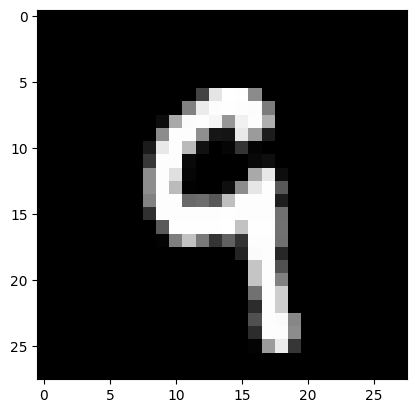

In [17]:
img = X_train.T
import random
import matplotlib.pyplot as plt
index = random.randrange(0, img.shape[1])
plt.imshow(img[:,index].reshape(28,28), cmap = "gray")
plt.show()

In [19]:
train_data_tensor = torch.tensor(X_train , dtype = torch.float32)
train_label_tensor = torch.tensor(Y_train , dtype = torch.float32)

In [20]:
train_dataset = TensorDataset(train_data_tensor, train_label_tensor)

In [21]:
batch_size = 32

In [22]:
train_dataloader = DataLoader(train_dataset , batch_size = batch_size , shuffle  =True)

In [23]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256,10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

model = SimpleModel()

In [26]:
import torch.optim as optim

criterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() , lr = 0.001)

In [31]:
num_epochs = 10

for epoch in range(num_epochs):
    total_loss = 0.0
    
    for inputs, labels in train_dataloader:
        optimizer.zero_grad() # zero the gradients
        outputs = model(inputs) #forward propagation
        loss = criterian(outputs, labels) #computes the loss 
        loss.backward() #backword propagation
        optimizer.step() ##update the weights
        
        total_loss += loss.item() * inputs.size(0) ##acumulate the loss
    
    avg_loss = total_loss / len(train_dataset)
    print("epoch is" , epoch , "loss value is" , avg_loss)

epoch is 0 loss value is 0.054782048727916616
epoch is 1 loss value is 0.04254744765625536
epoch is 2 loss value is 0.05240514711759271
epoch is 3 loss value is 0.07919069389686893
epoch is 4 loss value is 0.15848671795251032
epoch is 5 loss value is 0.08137889018520353
epoch is 6 loss value is 0.5550995253979204
epoch is 7 loss value is 0.15114574913243642
epoch is 8 loss value is 0.15502490894441667
epoch is 9 loss value is 0.1077884682207889


In [62]:
test_data_tensor = torch.tensor(X_test , dtype = torch.float32)

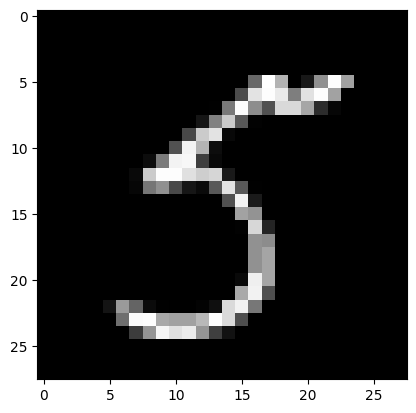

In [73]:
img = X_test.T
import random
import matplotlib.pyplot as plt
index = random.randrange(0, img.shape[1])
plt.imshow(img[:,index].reshape(28,28), cmap = "gray")
plt.show()

In [74]:
one_record = test_data_tensor[index]
one_record = one_record.unsqueeze(0)

In [75]:
with torch.no_grad():
    prediction = model(one_record)

In [76]:
prediction_label = torch.argmax( prediction, dim = 1)

In [77]:
prediction_label.numpy()[0]

5